# NFL Player Clustering By Position: RBs

For the RBs, since we are only using my engineered features, we will not use PCA.

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [111]:
rb_features = pd.read_csv("https://raw.githubusercontent.com/jake-lukasik/NFL-Player-Clustering/refs/heads/main/filtered-data/NFL-RB-Features.csv")
rb_features = rb_features.drop(columns=["Unnamed: 0"])
rb_features.head()

,TD_per_Att,Fmb_per_Att,1D_per_Att,TD_per_Game,Fmb_per_Game,TD_to_Fmb,Starter_Ratio,Lng_Yds_ratio
0,0.037681,0.005797,0.237681,0.812500,0.125000,6.500000,1.000000,0.035910
1,0.049231,0.009231,0.289231,0.941176,0.176471,5.333333,1.000000,0.045289
2,0.044304,0.015823,0.268987,0.875000,0.312500,2.800000,1.000000,0.023095
3,0.046053,0.003289,0.269737,0.823529,0.058824,14.000000,1.000000,0.025412
4,0.036304,0.013201,0.234323,0.785714,0.285714,2.750000,0.928571,0.048917


In [112]:
rb_IDs = pd.read_csv("https://raw.githubusercontent.com/jake-lukasik/NFL-Player-Clustering/refs/heads/main/filtered-data/NFL-RB-Identifiers.csv")
rb_IDs = rb_IDs.drop(columns=["Unnamed: 0"])
rb_IDs.head()

,Player,Team
0,Saquon Barkley,PHI
1,Derrick Henry,BAL
2,Kyren Williams,LAR
3,Bijan Robinson,ATL
4,Jonathan Taylor,IND


In [113]:
# deal w/ zeroes and infs
rb_features = rb_features.replace([np.inf, -np.inf], np.nan)
rb_features = rb_features.fillna(0)

In [114]:
# scale just features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(rb_features)

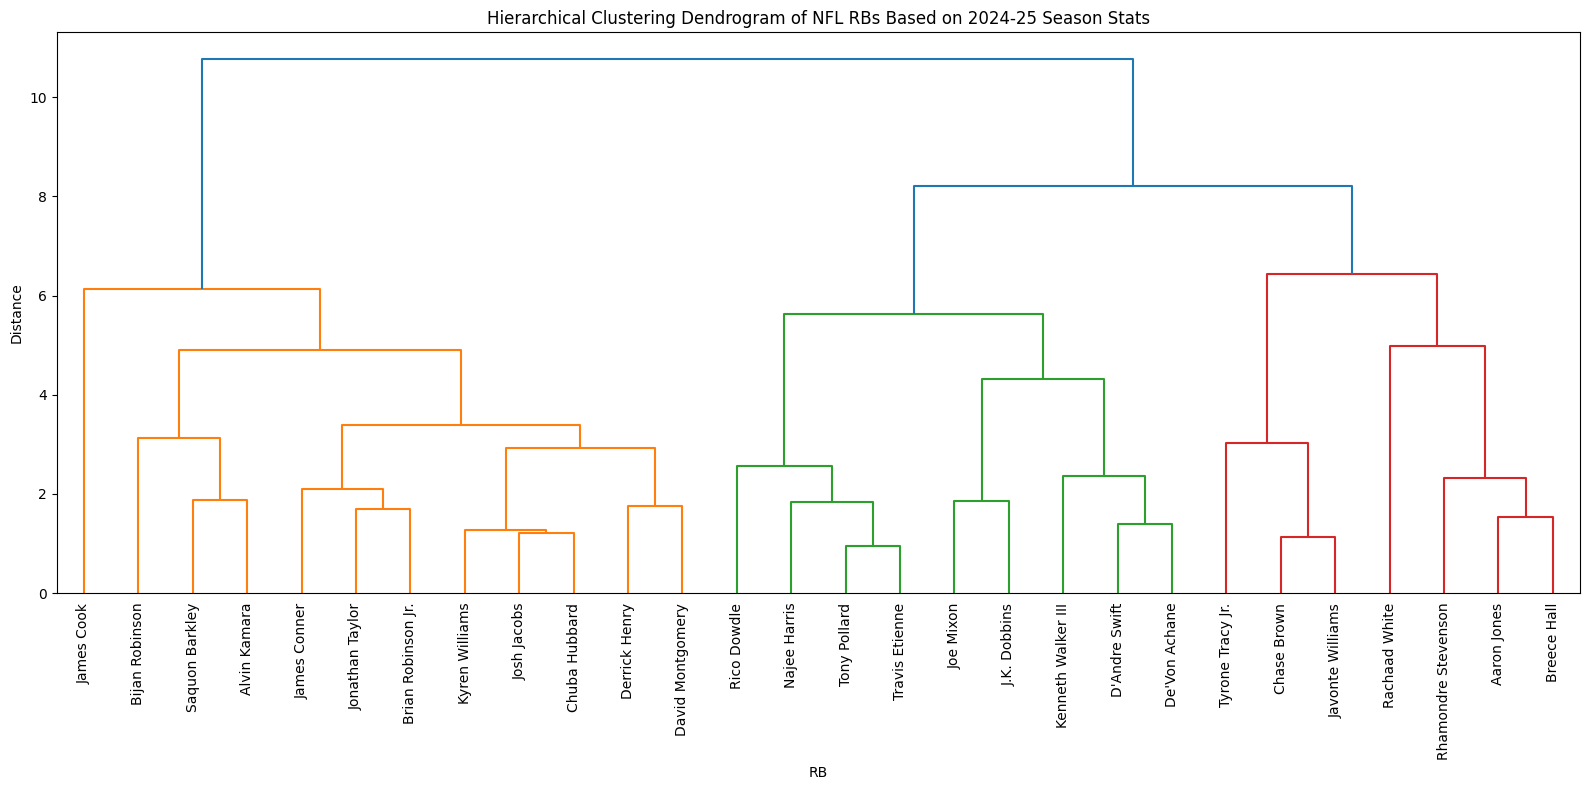

In [115]:
dend_links = linkage(features_scaled, method='ward')

# plot dendogram of NFL RB stats using hierarchical clustering
plt.figure(figsize=(16, 8))
dendrogram(dend_links, labels=rb_IDs["Player"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram of NFL RBs Based on 2024-25 Season Stats")
plt.xlabel("RB")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [116]:
# perform agglomerative hierarchical clustering on the scaled features and record what cluster they're in
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
rb_features['Cluster'] = agg.fit_predict(features_scaled)

In [117]:
# perform PCA and keep two highest components (just for the sake of plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

# initialize DataFrame with PCA results and cluster info
rb_pca = pd.DataFrame({
    'Player': rb_IDs['Player'],
    'Team': rb_IDs['Team'],
    'Cluster': rb_features['Cluster'],
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1]
})

# plot with hovertext to view rb info
fig = px.scatter(
    rb_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['Player', 'Team', 'Cluster'],
    title='NFL RB Clusters (Agglomerative Clustering + PCA)'
)

fig.update_traces(marker=dict(size=10))
fig.update_layout(legend_title_text='Cluster')
fig.show()

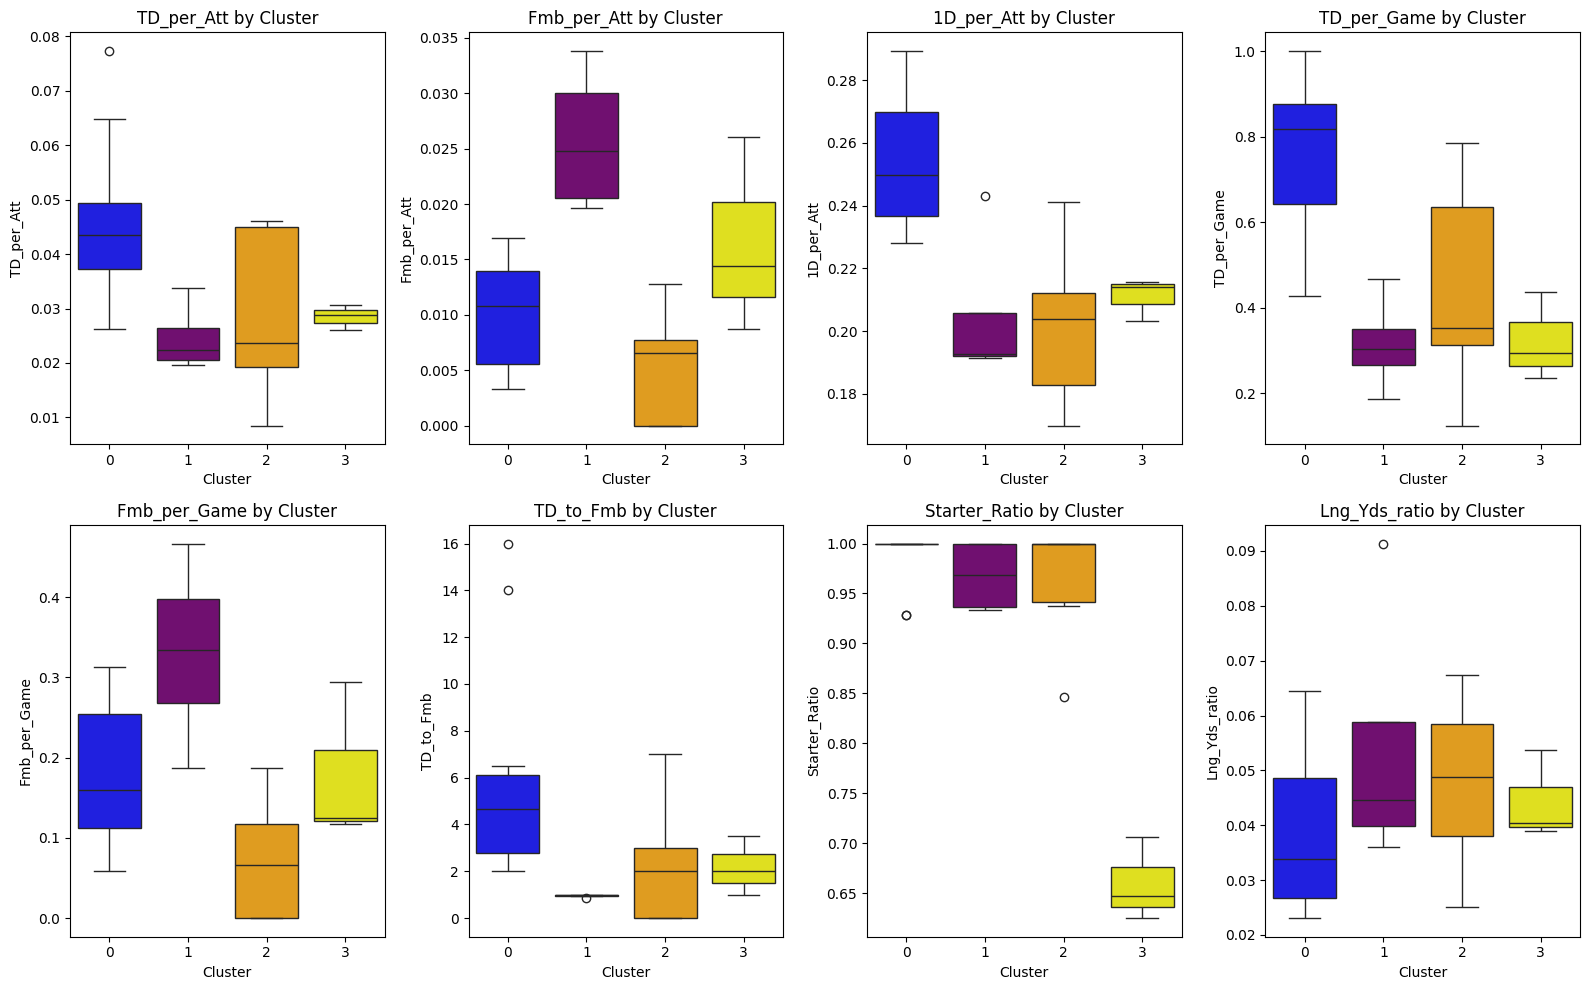

In [120]:
# stole this barplot idea right from the QB one
# plot barplot for each cluster in each statistic
features_for_plotting = ['TD_per_Att', 'Fmb_per_Att', '1D_per_Att', 'TD_per_Game', 'Fmb_per_Game', 'TD_to_Fmb', 'Starter_Ratio', 'Lng_Yds_ratio']
custom_colors = ['blue', 'purple', 'orange', 'yellow']

plt.figure(figsize=(16, 10))

for i, stat in enumerate(features_for_plotting, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Cluster', 
                y=stat, 
                data=rb_features, 
                hue='Cluster', 
                palette=custom_colors, 
                legend=False)
    plt.title(f'{stat} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(stat)

plt.tight_layout()
plt.show()